# MLOps Exercise: Medical Image Classification with Chest X-Ray Images

## Introduction

In this exercise, you'll gain practical experience with MLOps (Machine Learning Operations) by working on a real-world problem: classifying chest X-ray images to diagnose pneumonia. You'll go through various stages, from data cleaning to deployment, learning how to manage an end-to-end machine learning pipeline.

### Prerequisites

- Basic understanding of Python
- Familiarity with machine learning concepts
- Experience with Jupyter Notebooks

### Tools and Libraries

- Python
- NumPy
- OpenCV
- TensorFlow/Keras
- scikit-learn
- Flask
- Matplotlib
- imbalanced-learn

These libraries should cover most requirements for this exercise, including data manipulation (NumPy, pandas), visualization (Matplotlib), machine learning (scikit-learn, TensorFlow), image processing (OpenCV), and class imbalance treatment (imbalanced-learn).

### Table of Contents

1. [Data Loading and Cleaning](#Data-Loading-and-Cleaning)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
3. [Class Imbalance](#Class-Imbalance)
4. [Model Building](#Model-Building)
5. [Data Augmentation](#Data-Augmentation)
6. [Model Evaluation](#Model-Evaluation)
7. [Model Deployment (Bonus)](#Model-Deployment-(Bonus))


## Environment Setup

Before we begin, let's set up the environment. We'll install the necessary Python packages for this exercise.

```bash
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask
```

You can also create a `requirements.txt` file with the above packages and install them using `pip install -r requirements.txt`.
Be aware that you should download ipykernel and export your env to the jupyter notebook.
```bash
python -m ipykernel install --user --name=my_new_env
```

## Data Loading and Cleaning

### Objective

Load the dataset and clean it by removing corrupted images.

### Guidance

1. Download the Chest X-Ray Images (Pneumonia) dataset and place it in a directory accessible by this notebook. From https://ametice.univ-amu.fr
2. Unzip the dataset and explore its directory structure.
3. Load the images and labels for training.
4. Write a function to scan for and remove any corrupted or invalid images.

### Exercise

Now, load the dataset use the zipfile library and clean it by removing corrupted images. Write your code in the cell below.

```python
import zipfile

zip_file_path = 'path/to/your/zip/file.zip'
extract_path = 'path/to/extract/folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
```

After extracting, your dataset should have the following folder structure:

```
/
|-- test/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- train/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- val/
    |-- NORMAL/
    |-- PNEUMONIA/
```

You can point `train_path` and `test_path` to the `train` and `test` folders inside this extracted directory

Imports

In [1]:

import zipfile
import os
import shutil
import matplotlib.pyplot as plt
import random
import numpy as np


In [4]:
# Extract the Data to a specific directory 
zip_file_path = r'C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\Dataset.zip'
extract_path = r'C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\TP1_Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [7]:
# ADD the path of train and test floders.
dataset_dir = r'C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\TP1_Dataset\chest_xray'

train_path = os.path.join(dataset_dir, 'train')
test_path = os.path.join(dataset_dir, 'test')

print(train_path,"------",test_path)


C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\TP1_Dataset\chest_xray\train ------ C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\TP1_Dataset\chest_xray\test


## Perform Data Processing and Data Cleaning
* Check If the Image Can Be Opened and Has the Right Extension
* Verify the Dimension of the Images
* Normalize the Data

In [35]:
#Check If the Image Can Be Opened and Has the Right Extension
from PIL import Image
from PIL import UnidentifiedImageError

def is_valid_image(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()  # Verify the image data
        return True
    except (UnidentifiedImageError, Exception):
        return False
# Verify the Dimension of the Images

desired_width = 128
desired_height = 128
def resize_image(image_path, output_path):
    with Image.open(image_path) as img:
        img = img.resize((desired_width, desired_height))
        img.save(output_path)
        
# Normalize the Data

def normalize_image(image_path):
    with Image.open(image_path) as img:
        img = img.convert("RGB") 
        img = np.array(img) / 255.0
        return img
    
# Image processing....
def process_images(input_folder, output_folder):
    for class_name in os.listdir(input_folder):
        class_input_folder = os.path.join(input_folder, class_name)
        class_output_folder = os.path.join(output_folder, class_name)
        
        os.makedirs(class_output_folder, exist_ok=True) 
        
        for filename in os.listdir(class_input_folder):
            image_path = os.path.join(class_input_folder, filename)
            
            if is_valid_image(image_path) and filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                # Process the image
                resized_image_path = os.path.join(class_output_folder, filename)
                resize_image(image_path, resized_image_path)
                normalized_image = normalize_image(resized_image_path)

In [36]:
# Train Data 
train_input_folder= train_path
train_output_folder= r'C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\Processed_TP1_Dataset\train'
process_images(train_input_folder, train_output_folder)

# Test Data 
test_input_floder= test_path
test_output_folder= r'C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\Processed_TP1_Dataset\test'
process_images(test_input_floder, test_output_folder)

## Exploratory Data Analysis (EDA)

### Objective

Understand the dataset's basic statistics and visualize the data.

### Guidance

1. Use matplotlib to visualize some sample images from each class.
2. Investigate the distribution of classes (Pneumonia/Normal).

### Exercise

Perform exploratory data analysis on the dataset. Write your code in the cell below.


In [41]:
# Show the images 
classes = [ 'PNEUMONIA','NORMAL']
def display_images(data_dir, classes, num_samples=5):
    plt.figure(figsize=(12, 6))
    
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        sample_images = random.sample(os.listdir(class_dir), num_samples)
        
        for j, image_file in enumerate(sample_images):
            image_path = os.path.join(class_dir, image_file)
            image = Image.open(image_path)
            
            plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
            plt.imshow(image, cmap='gray')
            plt.title(class_name)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()



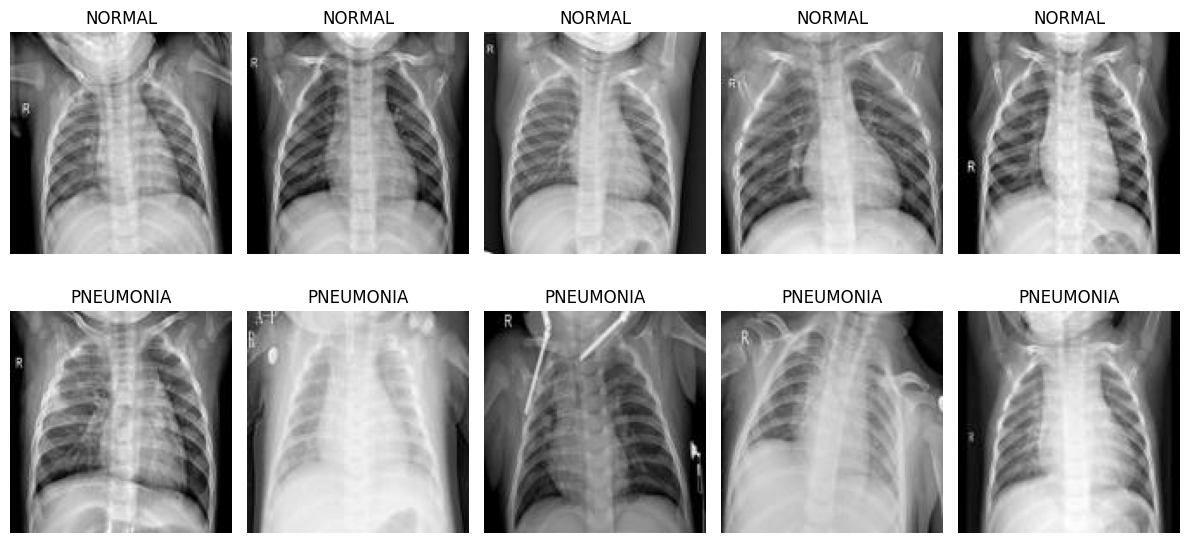

In [38]:
display_images(train_output_folder, classes, num_samples=5)

In [39]:
def plot_class_distribution(data_dir, classes):
    class_counts = [len(os.listdir(os.path.join(data_dir, class_name))) for class_name in classes]
    
    plt.figure(figsize=(8, 5))
    plt.bar(classes, class_counts)
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.show()

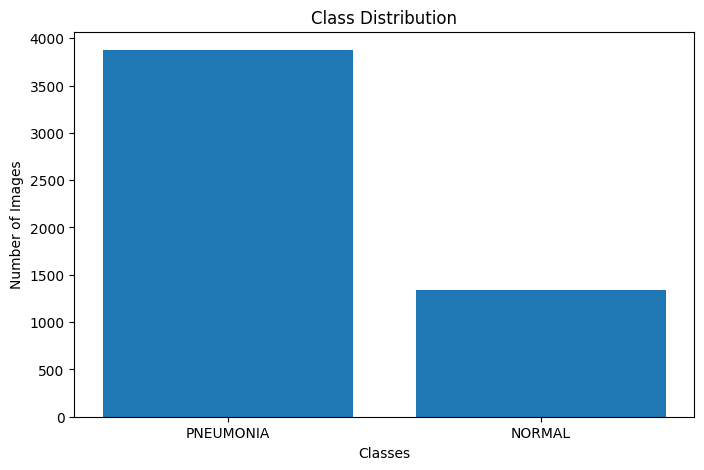

In [42]:
plot_class_distribution(train_output_folder, classes)

## Class Imbalance

### Objective

Understand how class imbalance affects model performance and learn ways to mitigate it.

### Guidance

1. Train a baseline model without accounting for class imbalance.
2. Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
3. Experiment with techniques like class weighting or oversampling methods like SMOTE to balance the classes.

### Exercise

Address the class imbalance and evaluate the impact on the model. Write your code in the cell below.



**Step1** Train a Convolutional Neural Network (CNN) as a baseline model for the classification task without accounting for class imbalance.



In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
# Define ImageDataGenerators
batch_size = 32
image_size = (128, 128)

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_output_folder,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',  
    class_mode='binary',     
    subset='training'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

validation_generator = validation_datagen.flow_from_directory(
    train_output_folder,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',  
    class_mode='binary',
    subset='validation'
)

Found 4173 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [46]:
## define the cnn model 
model = Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(128,128,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
## train the model on our Imbalanced data
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  
   
)

Epoch 1/10
131/131 [==============================] - 75s 556ms/step - loss: 0.4995 - accuracy: 0.7747
Epoch 2/10
131/131 [==============================] - 73s 555ms/step - loss: 0.3173 - accuracy: 0.8605
Epoch 3/10
131/131 [==============================] - 83s 631ms/step - loss: 0.2650 - accuracy: 0.8902
Epoch 4/10
131/131 [==============================] - 68s 515ms/step - loss: 0.2649 - accuracy: 0.8855
Epoch 5/10
131/131 [==============================] - 66s 503ms/step - loss: 0.2277 - accuracy: 0.9065
Epoch 6/10
131/131 [==============================] - 66s 501ms/step - loss: 0.2279 - accuracy: 0.9080
Epoch 7/10
131/131 [==============================] - 68s 515ms/step - loss: 0.2002 - accuracy: 0.9197
Epoch 8/10
131/131 [==============================] - 67s 506ms/step - loss: 0.1976 - accuracy: 0.9226
Epoch 9/10
131/131 [==============================] - 66s 499ms/step - loss: 0.1845 - accuracy: 0.9293
Epoch 10/10
131/131 [==============================] - 66s 505ms/step - l

In [47]:
from tensorflow import keras
model.save('model.keras')

**Evaluate model performance** 

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = train_generator.classes
y_pred_probs = model.predict(train_generator)
y_pred = np.round(y_pred_probs)

print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

131/131 [==============================] - 33s 249ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.25      0.25      1073
           1       0.74      0.74      0.74      3100

    accuracy                           0.61      4173
   macro avg       0.49      0.49      0.49      4173
weighted avg       0.61      0.61      0.61      4173

Confusion Matrix:
 [[ 269  804]
 [ 810 2290]]


**Step2** Address Class Imbalance using undersampling 

In [59]:


NORMAL_folder = r'C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\Processed_TP1_Dataset\train\NORMAL'
PNEUMONIA_folder = r'C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\Processed_TP1_Dataset\train\PNEUMONIA'

balanced_folder = r'C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\Balanced_TP1_Dataset'
os.makedirs(balanced_folder, exist_ok=True)

desired_ratio = 1.0  


NORMAL_images = os.listdir(NORMAL_folder)
PNEUMONIA_images = os.listdir(PNEUMONIA_folder)

# how much PNEUMONIA images to keep
num_PNEUMONIA_images = int(desired_ratio * len(NORMAL_images))


selected_PNEUMONIA_images = random.sample(PNEUMONIA_images, num_PNEUMONIA_images)

# Copy the selected PNEUMONIA images and all the NORMAL images to the balanced folder
for image in selected_PNEUMONIA_images:
    source_path = os.path.join(PNEUMONIA_folder, image)
    destination_path = os.path.join(balanced_folder, 'PNEUMONIA', image)
    shutil.copy(source_path, destination_path)

for image in NORMAL_images:
    source_path = os.path.join(NORMAL_folder, image)
    destination_path = os.path.join(balanced_folder, 'NORMAL', image)
    shutil.copy(source_path, destination_path)

print("Balanced dataset created in" ,balanced_folder)


Balanced dataset created in C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\Balanced_TP1_Dataset


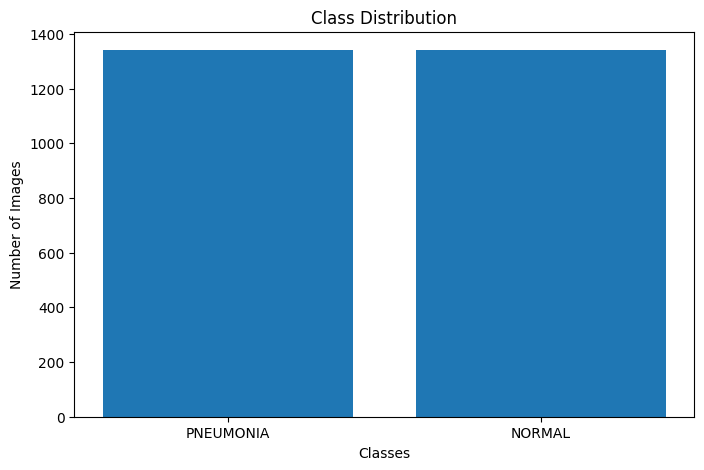

In [60]:
plot_class_distribution(balanced_folder, classes)

## Model Building

### Objective

Build and train a deep learning model for image classification.

### Guidance

1. Use a Convolutional Neural Network (CNN) for this task.
2. Experiment with different architectures and hyperparameters.

### Exercise

Build and train your model. Write your code in the cell below.


**Build a CNN model and train it based on the balanced data**

In [61]:
# Define ImageDataGenerators
batch_size = 32
image_size = (128, 128)

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    balanced_folder,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',  
    class_mode='binary',     
    subset='training'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

validation_generator = validation_datagen.flow_from_directory(
    balanced_folder,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',  
    class_mode='binary',
    subset='validation'
)

Found 2146 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [64]:
## define the cnn model 
model_Balanced = Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(128,128,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_Balanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
## train the model on our Imbalanced data
history = model_Balanced.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  
   
)

Epoch 1/10
68/68 [==============================] - 60s 847ms/step - loss: 0.6531 - accuracy: 0.6295
Epoch 2/10
68/68 [==============================] - 36s 529ms/step - loss: 0.4020 - accuracy: 0.8257
Epoch 3/10
68/68 [==============================] - 37s 537ms/step - loss: 0.3464 - accuracy: 0.8616
Epoch 4/10
68/68 [==============================] - 36s 530ms/step - loss: 0.3118 - accuracy: 0.8705
Epoch 5/10
68/68 [==============================] - 37s 546ms/step - loss: 0.2958 - accuracy: 0.8798
Epoch 6/10
68/68 [==============================] - 37s 540ms/step - loss: 0.2911 - accuracy: 0.8793
Epoch 7/10
68/68 [==============================] - 37s 541ms/step - loss: 0.2599 - accuracy: 0.8919
Epoch 8/10
68/68 [==============================] - 36s 530ms/step - loss: 0.2513 - accuracy: 0.9021
Epoch 9/10
68/68 [==============================] - 36s 532ms/step - loss: 0.2461 - accuracy: 0.9045
Epoch 10/10
68/68 [==============================] - 37s 542ms/step - loss: 0.2245 - accura

In [88]:

model_Balanced.save('model_Balanced.keras')

In [66]:
y_true = train_generator.classes
y_pred_probs = model.predict(train_generator)
y_pred = np.round(y_pred_probs)

print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

68/68 [==============================] - 12s 177ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.91      0.64      1073
           1       0.39      0.06      0.10      1073

    accuracy                           0.48      2146
   macro avg       0.44      0.48      0.37      2146
weighted avg       0.44      0.48      0.37      2146

Confusion Matrix:
 [[ 977   96]
 [1011   62]]


## Data Augmentation

### Objective

Improve your model's performance by using data augmentation techniques.

### Guidance

1. Apply data augmentation techniques like rotation, flipping, and zooming to generate more training data.
2. Retrain your model using the augmented dataset.

### Exercise

Apply data augmentation techniques and evaluate the impact on the model. Write your code in the cell below.


In [71]:


import cv2
normal_folder = r'C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\Balanced_TP1_Dataset\NORMAL'
not_normal_folder = r'C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\Balanced_TP1_Dataset\PNEUMONIA'


augmented_folder = r'C:\Users\hp\Desktop\SID\MSD\MLOps\TP1\Augmentes_TP1_Dataset'
os.makedirs(augmented_folder, exist_ok=True)


def apply_flip_augmentation(input_folder, output_folder):
    for filename in os.listdir(input_folder):
        image_path = os.path.join(input_folder, filename)
        img = cv2.imread(image_path)
       
        # Apply horizontal flip
        flipped_img = cv2.flip(img, 1)

        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, flipped_img)


apply_flip_augmentation(normal_folder, os.path.join(augmented_folder,'NORMAL'))

apply_flip_augmentation(not_normal_folder, os.path.join(augmented_folder,'PNEUMONIA'))



**Build and train the cnn model based on the augmented data**

In [72]:
# Define ImageDataGenerators
batch_size = 32
image_size = (128, 128)

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    augmented_folder,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',  
    class_mode='binary',     
    subset='training'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

validation_generator = validation_datagen.flow_from_directory(
    augmented_folder,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',  
    class_mode='binary',
    subset='validation'
)

Found 2146 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [73]:
## define the cnn model 
model_Augmentes = Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(128,128,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_Augmentes.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
## train the model on our augmented data
history = model_Augmentes.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  
   
)

Epoch 1/10
68/68 [==============================] - 66s 944ms/step - loss: 0.6239 - accuracy: 0.6519
Epoch 2/10
68/68 [==============================] - 45s 662ms/step - loss: 0.4429 - accuracy: 0.8015
Epoch 3/10
68/68 [==============================] - 41s 601ms/step - loss: 0.3499 - accuracy: 0.8509
Epoch 4/10
68/68 [==============================] - 42s 621ms/step - loss: 0.3206 - accuracy: 0.8644
Epoch 5/10
68/68 [==============================] - 40s 584ms/step - loss: 0.3153 - accuracy: 0.8705
Epoch 6/10
68/68 [==============================] - 38s 554ms/step - loss: 0.3021 - accuracy: 0.8686
Epoch 7/10
68/68 [==============================] - 38s 555ms/step - loss: 0.3340 - accuracy: 0.8593
Epoch 8/10
68/68 [==============================] - 40s 582ms/step - loss: 0.2979 - accuracy: 0.8774
Epoch 9/10
68/68 [==============================] - 38s 554ms/step - loss: 0.2739 - accuracy: 0.8849
Epoch 10/10
68/68 [==============================] - 37s 549ms/step - loss: 0.2632 - accura

In [87]:
model_Augmentes.save('model_Augmentes.keras')

## Model Evaluation

### Objective

Evaluate your model's performance using different metrics and visualization tools.

### Guidance

1. Use metrics like accuracy, precision, recall, and F1-score for evaluation.
2. Plot confusion matrices and ROC curves to visualize your model's performance.

### Exercise

Evaluate your model and interpret the results. Write your code in the cell below.


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_true = train_generator.classes
y_pred_probs = model.predict(train_generator)
y_pred = np.round(y_pred_probs)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)


68/68 [==============================] - 14s 207ms/step


In [80]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.5083876980428704
0.5535714285714286
0.08667287977632805
0.1498791297340854


In [82]:
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    plt.show()


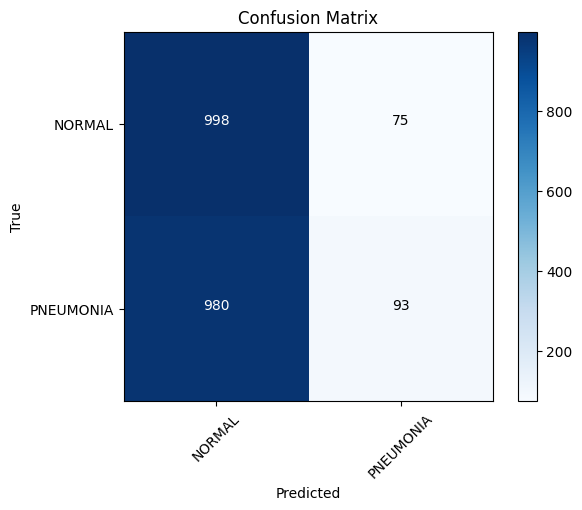

In [83]:
plot_confusion_matrix(y_true, y_pred, classes=['NORMAL', 'PNEUMONIA'], title='Confusion Matrix')


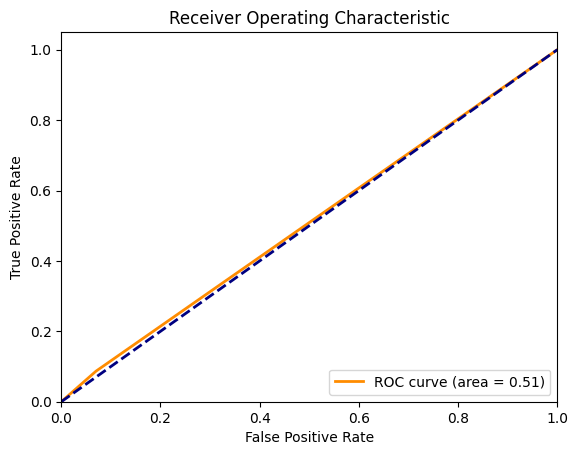

In [86]:
from sklearn.metrics import  roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


## Model Deployment (Bonus)

### Objective

Learn the basics of deploying a machine learning model.

### Guidance

1. Save your trained model.
2. Use Flask to create a simple REST API to serve your model.

### Exercise

Deploy your model using Flask. Write your code in the cell below.


In [ ]:

# Your code here for Model Deployment (Bonus)



### Next Steps

1. Experiment with more advanced architectures and hyperparameters.
2. Deploy your model
3. Integrate your model into a web application or other services.
4. Learn more about MLOps best practices and tools.


